You have given a train data in data/data-train_sv.csv file and test data in data/data_test_sv.csv file.
This data contains only single feature and the corresponding target value.

Train a linear regression model using the train data and predict the target values for the test data. Also, check the 
mean squared error.


In [0]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook


In [5]:
!ls

data_test_sv.csv  data_train_sv.csv  sample_data


In [6]:
data = np.loadtxt(open("data_train_sv.csv","rb"),delimiter=",")
print(data.shape)

(77, 2)


In [7]:
X = data[:,0]
Y = data[:,1]
X = X.reshape((-1,1))
Y = Y.reshape((-1,1))
print(X.shape)
print(Y.shape)

(77, 1)
(77, 1)


In [0]:
model = linear_model.LinearRegression(fit_intercept=True)

In [9]:
model.fit(X,Y)
print(model.coef_)
print(model.intercept_)

[[1.19367575]]
[-3.63963925]


In [0]:
data_test = np.loadtxt(open("data_test_sv.csv","rb"),delimiter=",")
X_test = data_test[:,0]
Y_test = data_test[:,1]
X_test = X_test.reshape((-1,1))
Y_test = Y_test.reshape((-1,1))
Y_Pred = model.predict(X_test)


In [11]:
error = mean_squared_error(Y_test,Y_Pred)
print(error)

6.593468270825139


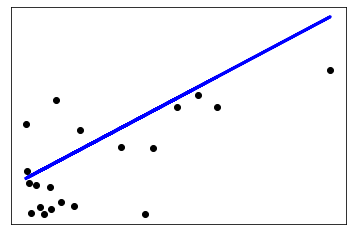

In [12]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_Pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [0]:
X_train_1 = np.array([1,2,3,4,5,6,7,8,9])
Y_train_1 = np.array([1,2,3,4,5,6,7,8,9])

In [0]:
class UnivariateLinReg :
  def __init__(self):
    self.theta_0=None
    self.theta_1=None

  def hypothesis(self,x):
    return self.theta_0 + self.theta_1*x

  def grad_theta_0 (self,x,y):
    y_pred = self.hypothesis(x)
    return (y_pred - y)

  def grad_theta_1 (self,x,y):
    y_pred = self.hypothesis(x)
    return (y_pred - y)*x

  def fit(self,X,Y,epochs=1,learning_rate=.01):
    self.theta_0 = 0.1
    self.theta_1 = 0.5
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dt0=0.0;
      dt1=0.0;
      for x,y in zip(X,Y):
        dt0 += self.grad_theta_0(x,y)
        dt1 += self.grad_theta_1(x,y)
      self.theta_0 -= ((learning_rate*dt0)/X.shape[0])
      self.theta_1 -= ((learning_rate*dt1)/X.shape[0])
      #print(self.theta_0,self.theta_1)

  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.hypothesis(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [0]:
rmdl = UnivariateLinReg()

In [16]:
rmdl.fit(X,Y,epochs=100000)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
y_pred_2 = rmdl.predict(X_test)


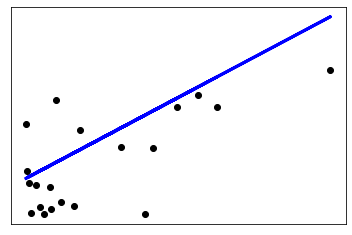

In [18]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_pred_2, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [19]:
error2 = mean_squared_error(y_pred_2,Y_test)
print(error2)

6.593468270825211
